In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import os 
os.getcwd()#Hibaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

'C:\\Users\\pc\\Desktop\\hft\\trading-technical-indicators-a-0\\tti\\indicators'

In [3]:
data=pd.read_csv("MASI.csv",parse_dates=True, index_col=0)
data["Volume"]=data["Close"]
df=data["Close"]
high=data["High"]
low=data["Low"]
data

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,12388.82,12442.75,12372.18,12420.15,12420.15,MAD
2018-01-03,12420.15,12510.45,12380.18,12509.58,12509.58,MAD
2018-01-04,12509.58,12543.53,12434.17,12463.08,12463.08,MAD
2018-01-05,12463.08,12538.65,12430.09,12537.75,12537.75,MAD
2018-01-08,12537.75,12568.29,12462.70,12479.42,12479.42,MAD
...,...,...,...,...,...,...
2022-03-28,12602.92,12640.22,12590.87,12640.22,12640.22,MAD
2022-03-29,12640.22,12721.38,12625.64,12721.38,12721.38,MAD
2022-03-30,12721.38,12782.51,12703.18,12751.45,12751.45,MAD


## Fonction

In [5]:
premier=0 

In [22]:
def GeneticAlgo(dim,obj_func,MAX_GENERATIONS,BOUND_LOW,BOUND_UP,POPULATION_SIZE=40,P_CROSSOVER = 0.9,P_MUTATION = 0.1):
	global premier
	ONE_MAX_LENGTH=dim
	HALL_OF_FAME_SIZE = 5
	CROWDING_FACTOR=20
	RANDOM_SEED = 40
	random.seed(RANDOM_SEED)
	if premier> 0 :
		del creator.FitnessMax
		del creator.Individual
	premier=premier+1
	toolbox = base.Toolbox()
	toolbox.register("Num", random.randint, BOUND_LOW, BOUND_UP)
	creator.create("FitnessMax", base.Fitness, weights=(1.0,))
	creator.create("Individual", list, fitness=creator.FitnessMax)
	toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.Num, ONE_MAX_LENGTH)
	toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
	toolbox.register("evaluate", obj_func)
	toolbox.register("select", tools.selTournament, tournsize=3)
	toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
	toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=0.20)
	def main():
		population = toolbox.populationCreator(n=POPULATION_SIZE)
		stats = tools.Statistics(lambda ind: ind.fitness.values)
		stats.register("max", np.max)
		stats.register("avg", np.mean)
		hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
		population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,ngen=MAX_GENERATIONS
			, stats=stats, halloffame=hof, verbose=True)
		print("Hall of Fame Individuals = ", *hof.items, sep="\n")
		print("Best Ever Individual = ", [ int(i) for i in hof.items[0]])
		maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
		sns.set_style("whitegrid")
		plt.plot(maxFitnessValues, color='red')
		plt.plot(meanFitnessValues, color='green')
		plt.xlabel('Génération')
		plt.ylabel('Max / Moyenne Fitness')
		plt.title('Max et Moyenne de  Fitness opar générations')
		plt.show()
	main()

In [23]:
# Coût des transactions
ti=0.0022
fr=0.0011
cb=0.0011
taux=ti+fr+cb

## **TEST RSI**

In [7]:
from _relative_strength_index import RelativeStrengthIndex

In [8]:
data

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,12388.82,12442.75,12372.18,12420.15,12420.15,MAD
2018-01-03,12420.15,12510.45,12380.18,12509.58,12509.58,MAD
2018-01-04,12509.58,12543.53,12434.17,12463.08,12463.08,MAD
2018-01-05,12463.08,12538.65,12430.09,12537.75,12537.75,MAD
2018-01-08,12537.75,12568.29,12462.70,12479.42,12479.42,MAD
...,...,...,...,...,...,...
2022-03-28,12602.92,12640.22,12590.87,12640.22,12640.22,MAD
2022-03-29,12640.22,12721.38,12625.64,12721.38,12721.38,MAD
2022-03-30,12721.38,12782.51,12703.18,12751.45,12751.45,MAD


In [9]:
rsi=RelativeStrengthIndex(data)

In [10]:
rsi._calculateTi(period=16)

,COURS_CLOTURE,rsi
Date,,
2018-01-02,12420.15,NaN
2018-01-03,12509.58,NaN
2018-01-04,12463.08,NaN
2018-01-05,12537.75,NaN
2018-01-08,12479.42,NaN
...,...,...
2022-03-28,12640.22,0.462647
2022-03-29,12721.38,0.592328
2022-03-30,12751.45,0.527930


<module 'matplotlib.pyplot' from 'C:\\Users\\pc\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

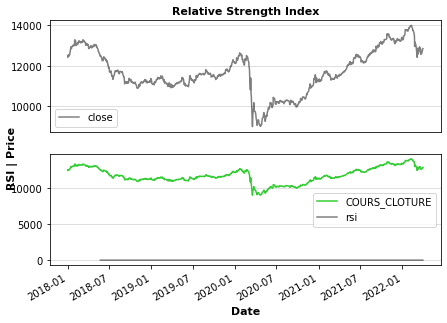

In [11]:
rsi.getTiGraph()

In [12]:
rsi.getTiSignal()

('hold', 0)

In [13]:
rsi.getTiValue()

[12843.52, 0.46019879540096864]

In [14]:
data=df

In [15]:
df=pd.DataFrame(df)


Simulation Data:
            signal open_trading_action stock_value exposure portfolio_value  \
Date                                                                         
2018-01-02   hold                none    12420.15      0.0             0.0   
2018-01-03   hold                none    12509.58      0.0             0.0   
2018-01-04   hold                none    12463.08      0.0             0.0   
2018-01-05   hold                none    12537.75      0.0             0.0   
2018-01-08   hold                none    12479.42      0.0             0.0   
...           ...                 ...         ...      ...             ...   
2022-03-28   hold                none    12640.22      0.0             0.0   
2022-03-29   hold                none    12721.38      0.0             0.0   
2022-03-30   hold                none    12751.45      0.0             0.0   
2022-03-31   hold                none    12818.11      0.0             0.0   
2022-04-01   hold                none    1284

'\nsimulation_data=pd.DataFrame(simulation_data)\nsimulation_statistics=pd.DataFrame(simulation_statistics)\n'

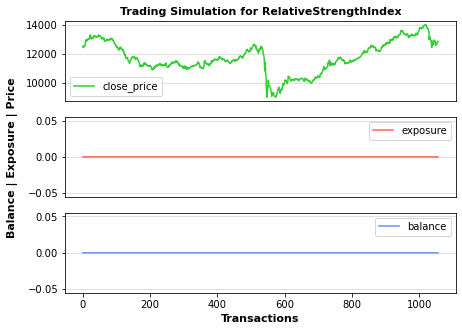

In [16]:
simulation_data, simulation_statistics, simulation_graph = \
rsi.getTiSimulation(close_values=df[['Close']], max_exposure=None,short_exposure_factor=1.5)
print('\nSimulation Data:\n', simulation_data)
print('\nSimulation Statistics:\n', simulation_statistics)
"""
simulation_data=pd.DataFrame(simulation_data)
simulation_statistics=pd.DataFrame(simulation_statistics)
"""

In [17]:
simulation_data=pd.DataFrame(simulation_data,index=df.index)
simulation_statistics=pd.DataFrame(simulation_statistics,index=df.index)
simulation_statistics

,number_of_trading_days,number_of_buy_signals,number_of_ignored_buy_signals,number_of_sell_signals,number_of_ignored_sell_signals,last_stock_value,last_exposure,last_open_long_positions,last_open_short_positions,last_portfolio_value,last_earnings,final_balance
Date,,,,,,,,,,,,
2018-01-02,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2018-01-03,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2018-01-04,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2018-01-05,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2018-01-08,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2022-03-29,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0
2022-03-30,1056,0,0,0,0,12843.52,0.0,0,0,0.0,0.0,0.0


In [18]:
def pmv(close,signal):
	"""
		La Plus-ou-moins-value

	"""
	close=np.array(close)
	signal=np.array(signal.fillna(0))
	qt=signal.cumsum()
	achat= np.where(signal>=1,1,0)
	PDR=[]
	for t in range(len(close)):
		p=(close[:t+1]*achat[:t+1]).sum()
		if achat[:t+1].sum()==0 :
			val=0
		else :
			p=p/(achat[:t+1].sum())
			val=qt[t]*p 
		PDR.append(val)
	PMV_lat=close*qt-PDR
	PMV_re=[0]
	for i in range(1,len(close)):
		vl=PDR[i]-PDR[i-1]+PMV_re[i-1]-close[i]*signal[i]
		PMV_re.append(vl)
	PMV=PMV_lat+PMV_re
	return PMV

In [19]:
def adjustsignal(signal):
	sig=[]
	qtite=0
	for i in signal:
		if i > 0 :
			sig.append(i)
			qtite+=1
		elif i < 0:
			if qtite >= abs(i) :
				sig.append(i)
				qtite+=-i
			else:
				sig.append(0)
		else:
			sig.append(0)
	return sig

## RSI

In [20]:
def  obj_rsi(period):
    global haut
    global bas
    period=int(period[0])
    signal=pd.DataFrame(index=df.index)
    rs=rsi._calculateTi(period)["rsi"]
    signal["compa_achat"]=np.nan
    signal["compa_vente"]=np.nan
    signal["compa_achat"][period:]=np.where(rs[period:] > bas,1,0)
    signal["signal_achat"]=signal["compa_achat"].diff()
    signal["compa_vente"][period:]=np.where(rs[period:] < haut,4,2)
    signal["signal_vente"]=signal["compa_vente"].diff()
    sig=np.where(signal["signal_achat"]==1,1,0)+np.where(signal["signal_vente"]==2,-1,0)
    sig=adjustsignal(sig)
    sig=pd.Series(sig, index=df.index)
    cours=df.Close*(1+taux*sig)
    pmval=pmv(cours,sig)
    return pmval.max(),

gen	nevals	max    	avg    
0  	40    	15634.7	8852.53
1  	36    	14119.6	10815.8
2  	38    	15358.8	13150.9
3  	39    	15358.8	13961.2
4  	38    	15358.8	14312  
5  	33    	15358.8	14326.4
Hall of Fame Individuals = 
[24]
[15.75387298837767]
[15.751154814185655]
[15.990802359145134]
[15.789733287984333]
Best Ever Individual =  [24]


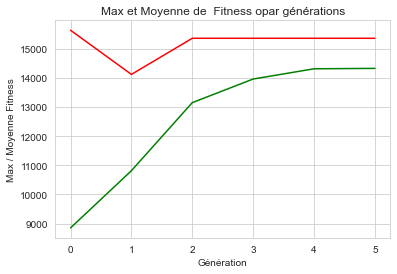

In [24]:
haut,bas=0.7,0.3
GeneticAlgo(1,obj_rsi,5,13,30)

gen	nevals	max    	avg    
0  	40    	11688.4	4226.83
1  	32    	11688.4	6058.01
2  	38    	11688.4	7922.32
3  	36    	11688.4	10615.6
4  	38    	11688.4	11688.4
5  	38    	11688.4	11200.5
Hall of Fame Individuals = 
[23.077149661220993]
[23.020759617201666]
[23.00271936816877]
[23.99728063183123]
[23]
Best Ever Individual =  [23]


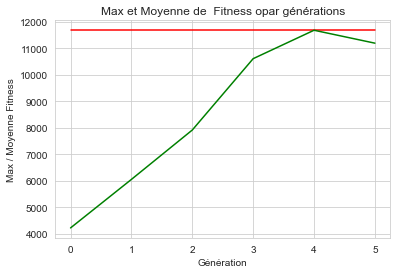

In [25]:
haut,bas=0.75,0.25
GeneticAlgo(1,obj_rsi,5,13,30)

gen	nevals	max    	avg    
0  	40    	9467.87	4557.44
1  	32    	9467.87	6910.24
2  	38    	9467.87	8026.1 
3  	36    	9467.87	8918.03
4  	40    	9467.87	9394.96
5  	37    	9467.87	9432.02
Hall of Fame Individuals = 
[19.060811053114637]
[19.222429431644212]
[19.266137364124827]
[19.016570161536567]
[19]
Best Ever Individual =  [19]


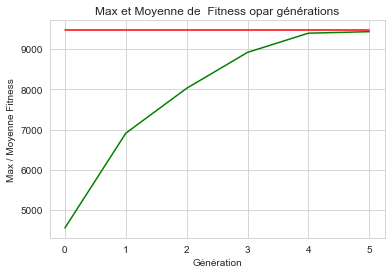

In [26]:
haut,bas=0.8,0.20
GeneticAlgo(1,obj_rsi,5,13,30)


gen	nevals	max    	avg    
0  	40    	1705.72	594.941
1  	32    	1705.72	1111.26
2  	38    	1705.72	1632.77
3  	35    	1705.72	1686.97
4  	38    	1705.72	1701.07
5  	38    	1705.72	1701.49
6  	34    	1705.72	1700.65
Hall of Fame Individuals = 
[17.930698178264976]
[17.961560848247043]
[17.97694204070671]
[17.983429838463433]
[17]
Best Ever Individual =  [17]


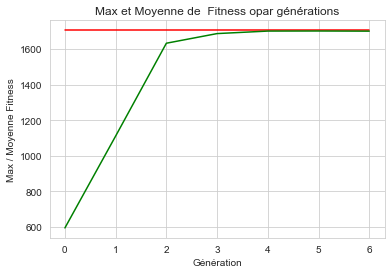

In [27]:
haut,bas=0.9,0.1
GeneticAlgo(1,obj_rsi,6,13,30)